<a href="https://colab.research.google.com/github/erendagasan/Eren-Dagasan-Personal/blob/main/DAMPFER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
life_time_final = 60 * 60 * 24 * 30 * 12 * 50
time_step = 300
Pinitial = 2000
Pambient = 1000
V = 0.001
Pcritic = 1500
Qinitial_vals = np.arange(1.1E-9, 1E-8, 1e-9)
# Qinitial_vals = np.arange(1.1E-8, 1E-7, 1E-8)
time_actual = np.arange(time_step, life_time_final, time_step)

real_df_list = []
calc_df_list = []

for Qinitial in Qinitial_vals:
    Premain_start = Pinitial - (Qinitial * time_step / V)
    Q_start = (Qinitial * ((Premain_start**2) - (Pambient**2)) / ((Pinitial**2) - (Pambient**2)))
    Pambient_start = Pambient+Pinitial-Premain_start

    Premain_list = []
    Premain_list.append(Pinitial)
    Premain_list.append(Premain_start)

    Pambient_list = []
    Pambient_list.append(Pambient)
    Pambient_list.append(Pambient_start)

    Q_calc_future_list = []
    Q_calc_future_list.append(Qinitial)
    Q_calc_future_list.append(Q_start)

    Premain_calc_buffer = Premain_start
    Premain_calc_buffer_before = Premain_start
    Pambient_calc_buffer = Pambient_start

    Q_buffer_calc = Q_start

    i = 0
    while Premain_calc_buffer > Pcritic and Pambient_calc_buffer < Pcritic:
        Premain_calc_buffer = Premain_calc_buffer - (Q_buffer_calc * time_step / V)
        Premain_list.append(Premain_calc_buffer)

        Pambient_calc_buffer = Pambient + (Pinitial-Premain_calc_buffer)
        Pambient_list.append(Pambient_calc_buffer)

        calc = Q_buffer_calc * ((Premain_calc_buffer**2) - (Pambient**2)) / ((Premain_calc_buffer_before**2) - (Pambient**2))
        Q_calc_future_list.append(calc)
        Q_buffer_calc = calc

        Premain_calc_buffer_before = Premain_calc_buffer
        i+=1


    Premain_real_list = []
    Premain_real_list.append(Pinitial)
    Premain_real_list.append(Premain_start)

    Pambient_real_list = []
    Pambient_real_list.append(Pambient)
    Pambient_real_list.append(Pambient_start)

    Q_real_future_list = []
    Q_real_future_list.append(Qinitial)
    Q_real_future_list.append(Q_start)

    Premain_real_buffer = Premain_start
    Premain_real_buffer_before = Premain_start
    Pambient_real_buffer = Pambient_start
    Pambient_real_buffer_before = Pambient_start

    Q_buffer_real = Q_start

    i = 0
    while Premain_real_buffer > Pcritic and Pambient_real_buffer < Pcritic:
        Premain_real_buffer = Premain_real_buffer - (Q_buffer_real * time_step / V)
        Premain_real_list.append(Premain_real_buffer)

        Pambient_real_buffer = Pambient + (Pinitial-Premain_real_buffer)
        Pambient_real_list.append(Pambient_real_buffer)

        calc = Q_buffer_real * ((Premain_real_buffer**2) - (Pambient_real_buffer_before**2)) / ((Premain_real_buffer_before**2) - (Pambient_real_buffer_before**2))
        Q_real_future_list.append(calc)
        Q_buffer_real = calc

        Premain_real_buffer_before = Premain_real_buffer
        Pambient_real_buffer_before = Pambient_real_buffer
        i+=1

    data_real = {
        "Qreal": Q_real_future_list,
        "Penv_real": Pambient_real_list,
        "Pint_real": Premain_real_list,
        "Duration": time_actual[:len(Premain_real_list)]
    }

    data_real = pd.DataFrame(data_real)

    data_real['Duration_min']   = data_real['Duration']/60
    data_real['Duration_hour']  = data_real['Duration_min']/60
    data_real['Duration_day']   = data_real['Duration_hour']/24
    data_real['Duration_month'] = data_real['Duration_day']/30
    data_real['Duration_year']  = data_real['Duration_month']/12


    real_df_list.append(data_real)

    data_calc = {
        "Qcalc": Q_calc_future_list,
        "Penv_calc": Pambient_list,
        "Pint_calc": Premain_list,
        "Duration": time_actual[:len(Premain_list)]
    }

    data_calc['Duration_min']   = data_calc['Duration']/60
    data_calc['Duration_hour']  = data_calc['Duration_min']/60
    data_calc['Duration_day']   = data_calc['Duration_hour']/24
    data_calc['Duration_month'] = data_calc['Duration_day']/30
    data_calc['Duration_year']  = data_calc['Duration_month']/12

    data_calc = pd.DataFrame(data_calc)
    calc_df_list.append(data_calc)

In [45]:
duration_df = pd.DataFrame()

for index, Qinitial in enumerate(Qinitial_vals):
  duration_df = pd.concat([duration_df, pd.DataFrame([[Qinitial, round(real_df_list[index]["Duration_year"].iloc[-1], 2), round(calc_df_list[index]["Duration_year"].iloc[-1], 2)]], columns=["Qinitial", "Real Duration (Year)", "Calculated Duration (Year)"])])

duration_df.reset_index(drop=True, inplace=True)
duration_df

,Qinitial,Real Duration (Year),Calculated Duration (Year)
0,1.100000e-09,32.70,22.40
1,2.100000e-09,17.13,11.73
2,3.100000e-09,11.60,7.95
3,4.100000e-09,8.77,6.01
4,5.100000e-09,7.05,4.83
5,6.100000e-09,5.90,4.04
6,7.100000e-09,5.07,3.47
7,8.100000e-09,4.44,3.04
8,9.100000e-09,3.95,2.71


In [48]:
duration_df = pd.DataFrame()

for index, Qinitial in enumerate(Qinitial_vals):
  duration_df = pd.concat([duration_df, pd.DataFrame([[Qinitial, round(real_df_list[index]["Duration_year"].iloc[-1], 2), round(calc_df_list[index]["Duration_year"].iloc[-1], 2)]], columns=["Qinitial", "Real Duration (Year)", "Calculated Duration (Year)"])])

duration_df.reset_index(drop=True, inplace=True)
duration_df

,Qinitial,Real Duration (Year),Calculated Duration (Year)
0,1.100000e-09,32.70,22.40
1,2.100000e-09,17.13,11.73
2,3.100000e-09,11.60,7.95
3,4.100000e-09,8.77,6.01
4,5.100000e-09,7.05,4.83
5,6.100000e-09,5.90,4.04
6,7.100000e-09,5.07,3.47
7,8.100000e-09,4.44,3.04
8,9.100000e-09,3.95,2.71


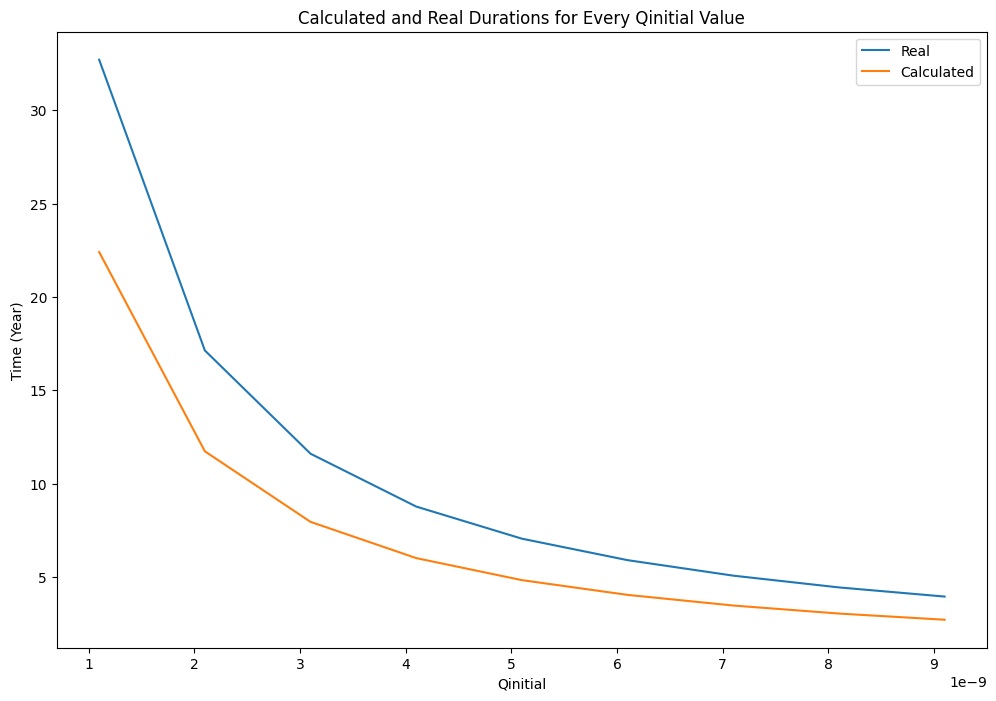

In [50]:
plt.figure(figsize=(12,8))

plt.plot(Qinitial_vals, duration_df["Real Duration (Year)"])
plt.plot(Qinitial_vals, duration_df["Calculated Duration (Year)"])

plt.title("Calculated and Real Durations for Every Qinitial Value")
plt.xlabel('Qinitial')
plt.ylabel('Time (Year)')
plt.legend(["Real","Calculated"], loc="upper right")
plt.show()

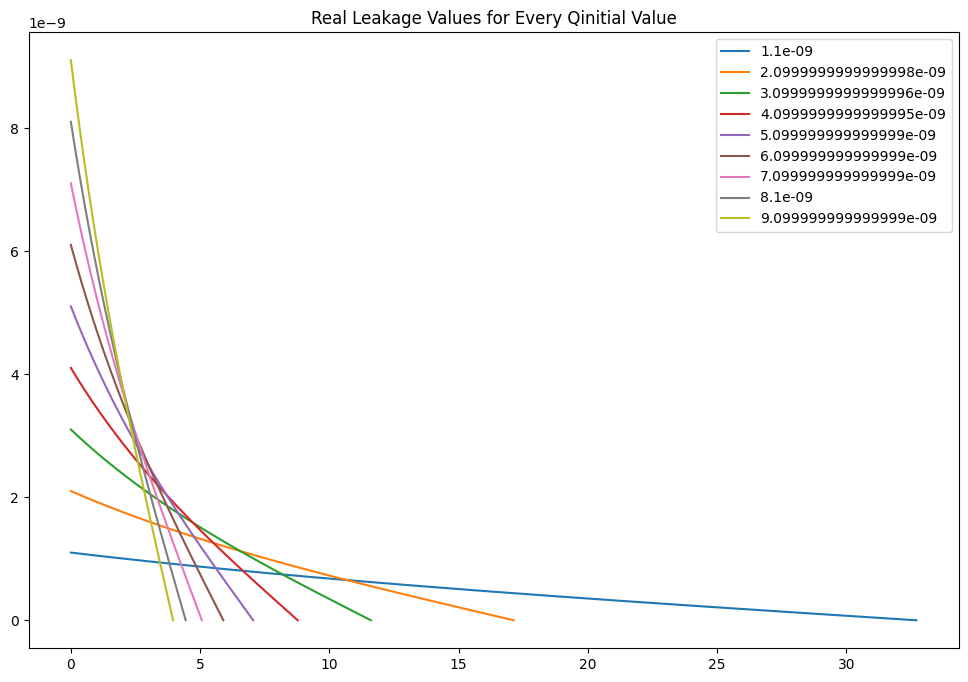

In [25]:
plt.figure(figsize=(12,8))

for index, Qinitial in enumerate(Qinitial_vals):
  plt.plot(real_df_list[index]["Duration_year"], real_df_list[index]["Qreal"])

plt.title("Real Leakage Lines for Every Qinitial Value")
plt.legend(Qinitial_vals, loc="upper right")
plt.show()

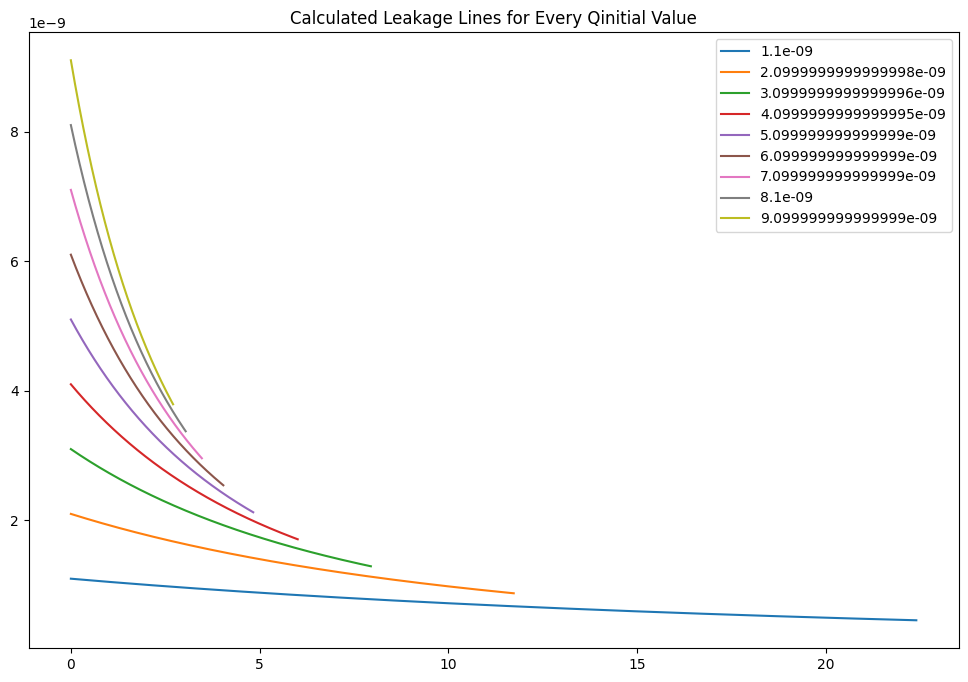

In [26]:
plt.figure(figsize=(12,8))

for index, Qinitial in enumerate(Qinitial_vals):
  plt.plot(calc_df_list[index]["Duration_year"], calc_df_list[index]["Qcalc"])

plt.title("Calculated Leakage Lines for Every Qinitial Value")
plt.legend(Qinitial_vals, loc="upper right")
plt.show()

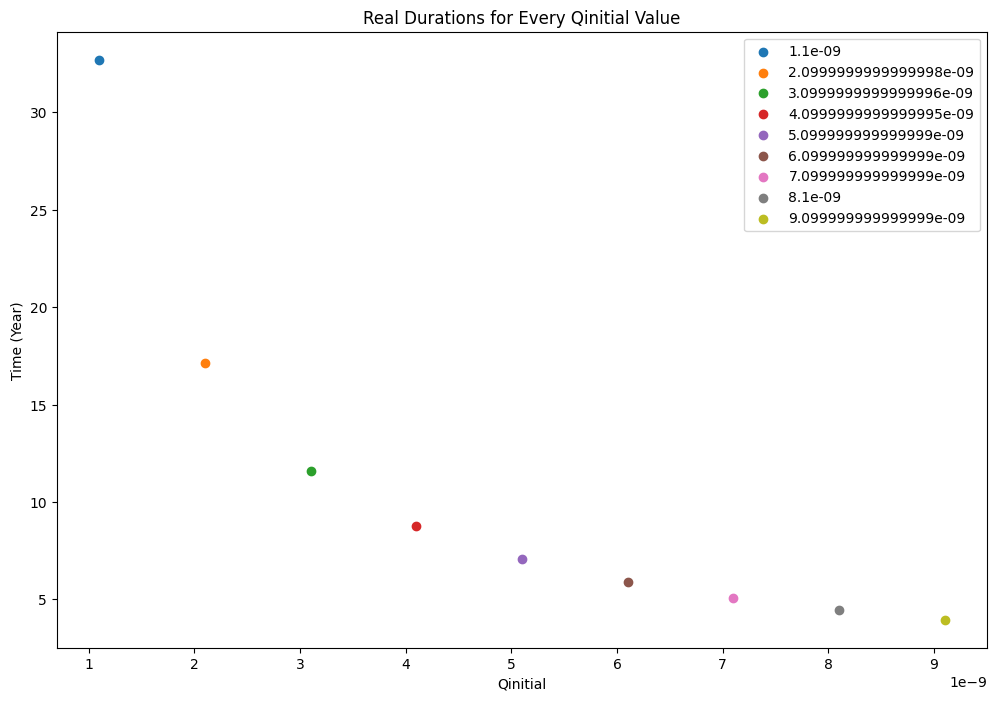

In [38]:
plt.figure(figsize=(12,8))

for index, Qinitial in enumerate(Qinitial_vals):
  plt.scatter(Qinitial, real_df_list[index]["Duration_year"].iloc[-1])

plt.title("Real Durations for Every Qinitial Value")
plt.xlabel('Qinitial')
plt.ylabel('Time (Year)')
plt.legend(Qinitial_vals, loc="upper right")
plt.show()